# Exploring datasets based on data - Ticket Dumps

In [1]:
# Standard Libs
import pandas as pd
import numpy as np

# Visulization/Plots Libs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

# Toolkit Lib
import sklearn
from sklearn.preprocessing import LabelEncoder, Imputer
import scipy
from scipy import stats

## Dataset

- Data set - Car Evaluation Data set from UCI Repom

In [4]:
data_set = 'Dataset'
df = pd.read_csv('Data\\' + data_set + '.csv')
# Not Needed unless using LabelEncoder:- df = df.fillna('BLANK')
print df.shape
df.head(3)

(1728, 7)


,Buying Price,Maintenance Price,Doors,Persons,Luggage Space,Safety,Car Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [5]:
df.fillna('BLANK').describe(include='all')    # Filling blank values as 'BLANK' so as to understand blank value statistics!

,Buying Price,Maintenance Price,Doors,Persons,Luggage Space,Safety,Car Evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


------

# Analysis :
.


    #### 1. Univariate Analysis: Column/feature wise
    #### 2. Bi-variate Analysis: Column-Column relationship wise
    #### 3. Multi-variate Analysis: All columns/features relationship at once
    #### 4. Missing Value Treatment
    #### 5. Outlier treatment
    #### 6. Label Encoding or OneHotEncoding
 

---

# 1. Univariate Analysis: Column wise frequency Distribution

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. 

Unique Values =  4 

med      25.0
high     25.0
low      25.0
vhigh    25.0
Name: Buying Price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008101860>], dtype=object)

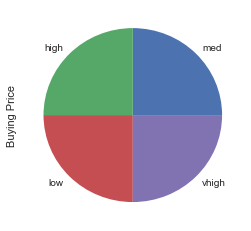

In [6]:
# col1
df_freq = df[df.columns[0]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[0]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  4 

med      25.0
high     25.0
low      25.0
vhigh    25.0
Name: Maintenance Price, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D45D978>], dtype=object)

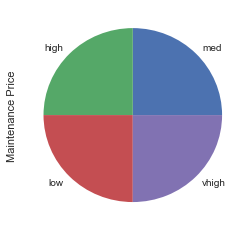

In [7]:
# col2
df_freq = df[df.columns[1]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[1]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  4 

3        25.0
5more    25.0
4        25.0
2        25.0
Name: Doors, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D45D3C8>], dtype=object)

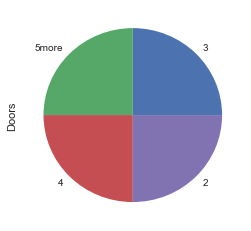

In [8]:
# col3
df_freq = df[df.columns[2]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[2]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  3 

more    33.333333
4       33.333333
2       33.333333
Name: Persons, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4ECEF0>], dtype=object)

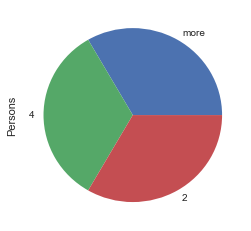

In [9]:
# col4
df_freq = df[df.columns[3]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[3]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  3 

med      33.333333
small    33.333333
big      33.333333
Name: Luggage Space, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7FEA20>], dtype=object)

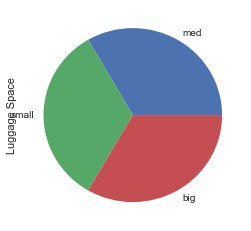

In [10]:
# col 5
df_freq = df[df.columns[4]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[4]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  3 

med     33.333333
high    33.333333
low     33.333333
Name: Safety, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7FE198>], dtype=object)

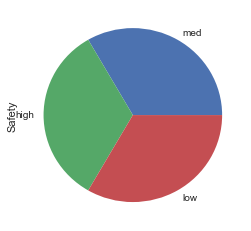

In [11]:
# col6
df_freq = df[df.columns[5]].value_counts(normalize=True, dropna=False)[0:10]*100
print 'Unique Values = ', len(df[df.columns[5]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

Unique Values =  4 

unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: Car Evaluation, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5F8908>], dtype=object)

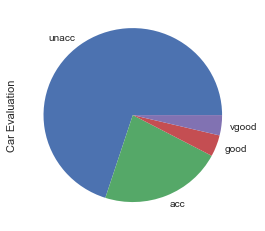

In [12]:
# col7
df_freq = df[df.columns[6]].value_counts(normalize=True, dropna=False)*100
print 'Unique Values = ', len(df[df.columns[6]].unique()), '\n'
print df_freq
df_freq.plot(kind='pie', subplots=True, figsize=(4, 4))

# 2. Bi-variate Analysis: Column-Column relationships

Bi-variate Analysis finds out the relationship between **two variables/columns**. Here, we look for association and disassociation between variables at a pre-defined significance level. 

We can perform bi-variate analysis for any combination of categorical and continuous variables: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. 

#### TYPE 1 - Continous & Continous:

- 1 - Scatter plot between two variables

- 2 - Correlation matrix between two variables

We plot scatter plot between the two columns and based on that we can tell the correlation(orally) as shown in the below pic.

<img src='Data/img1.PNG'>

**Correlation** varies between -1 and +1.

- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
- 0: No correlation

       col1      col2
0  0.425369  2.193804
1 -0.130281  0.159804
2 -0.613437 -0.037182
3 -0.488720  0.481144
4 -0.102231  0.636828


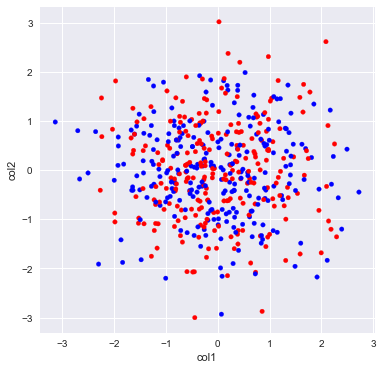

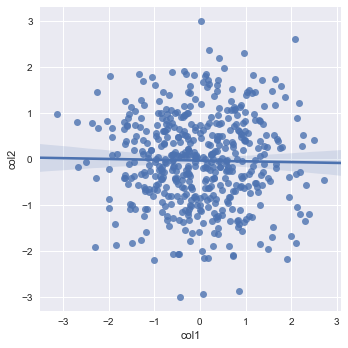

In [13]:
# Dummy Dataset 1:

dummy_df = pd.DataFrame({ 'col1': np.random.randn(500), 'col2': np.random.randn(500)})
print dummy_df.head()
dummy_df.plot(kind='scatter', x='col1', y='col2', c=['red','blue'], subplots=True, figsize=(6,6))
sns.lmplot(x='col1', y='col2', data=dummy_df)

- Scatter plot shows No correlation at all. Let's confirm it with the corr() table.

In [14]:
# Correlation Value: [col 2 x col 1]
dummy_df.corr()

,col1,col2
col1,1.000000,-0.017864
col2,-0.017864,1.000000


Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation (corr()). Correlation varies between -1 and +1.

Here, it is -0.012, i.e. 0 = No correlation

   col1  col2
0    65    72
1    72    69
2    78    79


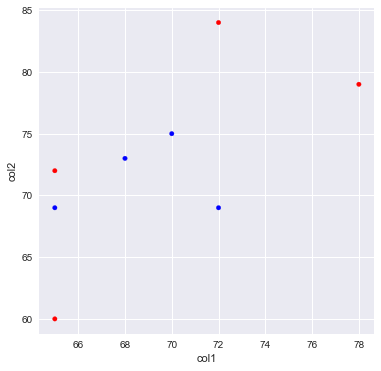

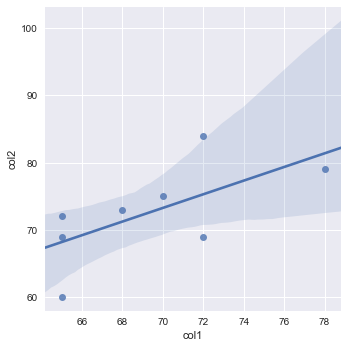

In [15]:
# Dummy Dataset 2:

dummy_df = pd.DataFrame({ 'col1': [65,72,78,65,72,70,65,68], 'col2': [72,69,79,69,84,75,60,73]})
print dummy_df.head(3)
dummy_df.plot(kind='scatter', x='col1', y='col2', c=['red','blue'], subplots=True, figsize=(6,6))
sns.lmplot(x='col1', y='col2', data=dummy_df)

- Scatter plot shows a hint of positive correlation. Let's confirm it with the corr() table.

In [16]:
# Correlation Matrix: [col 2 x col 1]
dummy_df.corr()

,col1,col2
col1,1.000000,0.648973
col2,0.648973,1.000000


Here, it's 0.65, i.e. +1 = Good positive relationship between two columns col1 and col2

#### TYPE 2 - Categorical & Categorical:


- 1- Two Way table with Counts and Count%
- 2- Chi-squared Test

In [17]:
# Two way table between two columns with Count Number:
two_way_table_COUNT = pd.crosstab(df['Buying Price'], df['Maintenance Price'], dropna=False, normalize=False, margins=False)
two_way_table_COUNT

Maintenance Price,high,low,med,vhigh
Buying Price,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


In [18]:
# Two way table between two columns with Count % distribution:
two_way_table_countPER = pd.crosstab(df['Buying Price'], df['Maintenance Price'], dropna=False, normalize="index", margins=True).apply(lambda x: x.round(4))*100
two_way_table_countPER['All(in %)'] = two_way_table_countPER['high'] + two_way_table_countPER['low'] + two_way_table_countPER['med'] + two_way_table_countPER['vhigh'] 
two_way_table_countPER

Maintenance Price,high,low,med,vhigh,All(in %)
Buying Price,,,,,
high,25.0,25.0,25.0,25.0,100.0
low,25.0,25.0,25.0,25.0,100.0
med,25.0,25.0,25.0,25.0,100.0
vhigh,25.0,25.0,25.0,25.0,100.0
All,25.0,25.0,25.0,25.0,100.0


#### Chi-Squared test:

In [19]:
c, p, dof, e = stats.chi2_contingency(two_way_table_COUNT)

print 'P-value:', p

P-value: 1.0


# 3. Multi-variate Analysis: All columns/features relationship at once
 

Mutli-variate Analysis finds out the relationship between **all columns/features** with each other and with target all at once.

#### TYPE 1 - All Continous
    
- 1 - Scatter Matrix between all
- 2 - Correlation matrix between all
- 3 - Heat Map between all

We plot scatter plot between the two columns and based on that we can tell the correlation(orally) as shown in the below pic.

<img src='Data/img1.PNG'>

**Correlation** varies between -1 and +1.

- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
- 0: No correlation

In [20]:
# Dummy Dataset

l = list(np.random.uniform(low=1, high=100, size=1000))

dummy_df = pd.DataFrame({"A": list(np.array(l)*2),
                         "B": list(np.random.uniform(low=100, high=200, size=1000)),
                         "C": list(np.array(l)**2 + np.array(l)*2),
                         "D": list(np.random.uniform(low=500, high=550, size=1000)),
                         "Target": l})
dummy_df.head(3)

,A,B,C,D,Target
0,161.527770,197.406268,6684.332920,535.294709,80.763885
1,107.465718,163.952880,2994.685876,538.503514,53.732859
2,17.537303,196.420167,94.426553,504.241300,8.768652


- A = 2T
- C = T^2 + 2T
- T = T

#### Scatter Matrix

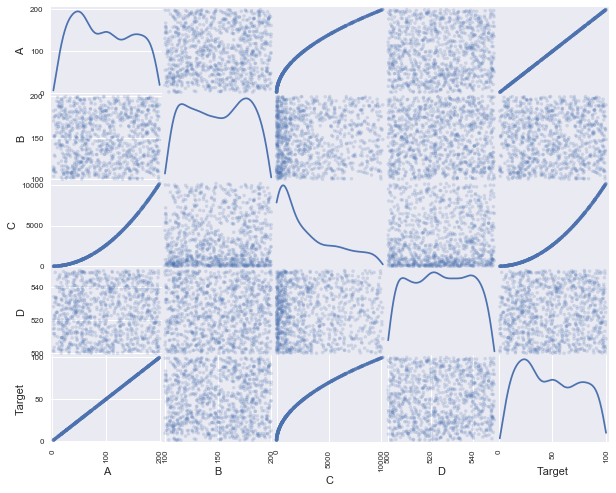

In [21]:
scatter_matrix(dummy_df, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.show()

        - Target vs A: Shows positive linear correlation
        - Target vs B: Shows No correlation
        - Target vs C: Shows positive moderate linear correlation
        - Target vs D: Shows No correlation

#### Correlation Matrix

In [22]:
dummy_df.corr()

,A,B,C,D,Target
A,1.000000,0.034285,0.972170,0.036625,1.000000
B,0.034285,1.000000,0.040561,0.001758,0.034285
C,0.972170,0.040561,1.000000,0.029670,0.972170
D,0.036625,0.001758,0.029670,1.000000,0.036625
Target,1.000000,0.034285,0.972170,0.036625,1.000000


In [23]:
# Look at this last coloumn:
dummy_df.corr().Target

A         1.000000
B         0.034285
C         0.972170
D         0.036625
Target    1.000000
Name: Target, dtype: float64

**Correlation** varies between -1 and +1.
- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and
- 0: No correlation

    - Correlation Values
    T vs A: +1 Positive corr
    T vs B: 0  No corr
    T vs C: +1 Positive corr
    T vs D: 0  No corr

#### Heat Map

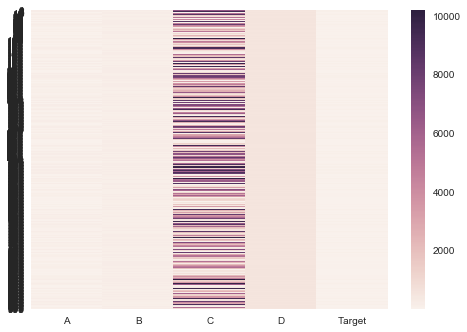

In [24]:
sns.heatmap(dummy_df)

#f, ax = plt.subplots(figsize = (4, 4))
#sns.heatmap(dummy_df, mask=np.zeros_like(dummy_df, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

.


# 4. Missing Value Treatment

In [25]:
# Missing Values
df.isnull().sum()

Buying Price         0
Maintenance Price    0
Doors                0
Persons              0
Luggage Space        0
Safety               0
Car Evaluation       0
dtype: int64

### Replace missing values with Mean/Median/Mode of entire column values

        - Mean or Median for Continous(Only Numeric) data
        - Mode for Categorical(Numeric/Text) data

In [26]:
# For imputing numeric cont values with mean/median/mode...

# from sklearn.preprocessing import Imputer
# df.loc[:, ['col1' , 'col2' ] = Imputer(missing_values='NaN', strategy='mean', axis=0).fit_transform(df.loc[:,['col1','col2'])
#  - or - 
# df.loc[:, ['col1' , 'col2' ] = df.loc[:,['col1','col2'].apply(lambda col: col.fillna(col.mean()), axis=0)

In [27]:
# For imputing categorical values with mode...

# Replacing 'NaN' values with most frequent value in value_counts()...
df.iloc[:, :-1] = df.iloc[:, :-1].apply(lambda col: col.fillna(col.value_counts().index[0]), axis=0)

### Dropping all rows with Target Variable(Time Received = nan)

In [28]:
df = df.dropna(subset=['TimeReceived'])

# Or, df[df.TimeReceived.isnull() == False]

.

# 5. Outlier Treatment

# 6. Label Encoding

In [27]:
data = df.copy()

le = LabelEncoder()
data.iloc[:, :-1] = data.iloc[:, :-1].apply(le.fit_transform)
data.head()

,Buying Price,Maintenance Price,Doors,Persons,Luggage Space,Safety,Car Evaluation
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
